<h1 style="text-align: center;">RESEARCH ON CARBON EMISSIONS AND GDP IN USA</h1>
<h2 style="text-align: center;">final project for analytic programming</h1>




- Team Member: Ruoyu Chen, Wei Lo, Zhengnan Li
- Repository: https://github.com/Zhengnan817/Final-Project-Carbon-emission


## Abstract

dataset1: gdp:
api1: emmission:https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/?frequency=annual&data[0]=value&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000  
api2: coefficient:https://api.eia.gov/v2/co2-emissions/co2-emissions-and-carbon-coefficients/data/?frequency=annual&data[0]=carbon-coefficient&data[1]=emissions&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000

## 1.Introduction 
Describe your project, including the scientific or business motivation for the research question you have chosen to answer. This section should summarize the content of your Final Project Proposal, so be sure to explain your research question, describe the source and content of the data set you have chosen to work with, and summarize your approach to meeting the requirements for the Project.

#### 1.1 Research Question

Research Question 1: How do carbon emissions from various sources (petroleum, natural gas, coal) evolve over time within the USA?

This research question aims to explore the dynamics of carbon emissions attributed to distinct sources—petroleum, natural gas, and coal—within the United States. It seeks to comprehend the emissions produced by these specific sources and discern how these emissions have undergone alterations or variations across a temporal spectrum. The investigation entails examining the quantitative levels of carbon emissions generated by each source individually and collectively, tracking their evolution across multiple time points. The focus is on analyzing the patterns, trends, and potential fluctuations in carbon emissions attributed to petroleum, natural gas, and coal over the specified time frame, thereby providing insights into the changing landscape of emissions and their sources within the country.
Research Question 2: What is the predictive relationship between the annual real GDP of U.S. states and the various categories of carbon emissions (Residential, Commercial, Transportation, Electric Power, Industrial) for the years 2017 to 2022?




This research question aims to investigate the predictive capability of different categories of carbon emissions on the annual real GDP of U.S. states over a six-year period. It seeks to understand whether and to what extent the levels of carbon emissions from various sectors can forecast or influence the economic performance, as measured by real GDP, across different states in the United States.

#### 1.3 Data Source

#### 1.3.1 dataset1 - BEA GDP by State
BEA estimates the value of the goods and services produced in each state and the District of Columbia quarterly and annually. The data include breakdowns of industries' contributions to each of these economies.

- Link: https://www.bea.gov/data/gdp/gdp-state
- Data Variables:

| Variable          | Description                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------|
| GeoFIPS           | The Geographic identifier                                                                       |
| GeoName           | Name of the geographical region(State name)                                                     |
| Region            | Region ID                                                                                       |
| TableName         | Table name(There are different table on the website)                                            |
| LineCode          | Indicater of the current escription                                                             |
| IndustryClassification | The classification of the industry                                                         |
| Description       | The type of data indicates                                                                      |
| Unit              | Unit of measurement                                                                             |
| 2017-2022         | Data for the years 2017 to 2022                                                                 |

Load the data and show the first 5 rows:

In [1]:
import pandas as pd
dataset1_url = "https://raw.githubusercontent.com/Zhengnan817/Final-Project-Carbon-emission/main/SAGDP1__ALL_AREAS_2017_2022.csv"
df_gdp_raw = pd.read_csv(dataset1_url)
df_gdp_raw.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2017,2018,2019,2020,2021,2022
0,"""00000""",United States,,SAGDP1,1.0,...,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,19612102.0,2.019390e+07,2.069209e+07,2.023407e+07,2.140769e+07,2.182204e+07
1,"""00000""",United States,,SAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,100.0,1.029670e+02,1.055070e+02,1.031710e+02,1.091560e+02,1.112680e+02
2,"""00000""",United States,,SAGDP1,3.0,...,Current-dollar GDP (millions of current dollars),Millions of current dollars,19612102.0,2.065652e+07,2.152140e+07,2.132295e+07,2.359403e+07,2.574411e+07
3,"""00000""",United States,,SAGDP1,4.0,...,Compensation (millions of dollars),Millions of current dollars,10434978.0,1.096769e+07,1.145978e+07,1.160229e+07,1.255663e+07,1.345524e+07
4,"""00000""",United States,,SAGDP1,5.0,...,Gross operating surplus (millions of dollars),Millions of current dollars,7873027.0,8.295055e+06,8.601459e+06,8.857004e+06,9.848221e+06,1.060610e+07


#### 1.3.2 dataset2 - Carbon Dioxide Emissions
The U.S. Energy Information Administration is committed to its free and open data by making it available through an Application Programming Interface (API) and its open data tools. EIA's API is multi-facetted and contains the following time-series data sets organized by the main energy categories.

- Link: https://www.eia.gov/opendata/browser/co2-emissions/co2-emissions-aggregates
- Data Variables:

| Variable       | Description                                        |
|----------------|----------------------------------------------------|
| period         | The year of the recorded data                       |
| sectorId       | Sector identifier                                  |
| sector-name    | Name of the sector of the carbon dioxide emission source (Commercial, Residential,Electric Power,etc.)                |
| fuelId         | Fuel identifier                                    |
| fuel-name      | Name of the fuel that produce co2(Petroleum,Coal,Natural Gas)                                    |
| stateId        | State identifier                                   |
| state-name     | Name of the state or region                         |
| value          | The value of the rows                       |
| value-units    | The unit of the value        |

Load the data using class APIReader and show the first 5 rows:

In [2]:
from carbon_emission.data_prep import APIReader  # noqa: E402
reader = APIReader()
df_co2_raw = reader.get_data()
df_co2_raw.head()

Fetching Data: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
0,2017,RC,Residential carbon dioxide emissions,CO,Coal,AK,Alaska,0.000000,million metric tons of CO2
1,2017,TT,Total carbon dioxide emissions from all sectors,NG,Natural Gas,AK,Alaska,17.566671,million metric tons of CO2
2,2017,RC,Residential carbon dioxide emissions,NG,Natural Gas,AK,Alaska,1.058200,million metric tons of CO2
3,2017,RC,Residential carbon dioxide emissions,TO,All Fuels,AK,Alaska,1.660980,million metric tons of CO2
4,2017,CC,Commercial carbon dioxide emissions,CO,Coal,AK,Alaska,0.683419,million metric tons of CO2


##### 1.3.3 Extra Dataset
GeoJSON: https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_1_states_provinces.geojson   
A json file aquired to support the chart of USA map. We will not elaborate on this dataset for it is not the focus of this analysis.


## 2.Research Approach

## 3.Exploratory Data Analysis

Due to the inherent characteristics of our dataset, most columns do not lend themselves to meaningful visualization, except for a few where charts can be utilized. Therefore, we are providing explanations and descriptions for each column. After integrating and organizing the data, we will proceed with visual analysis.

#### 3.1 Dataset1 - BEA GDP by State
First initialize the class EDAPerformer. After that, We can see these columns cover geographic data, table information, units, and years, which are useful for data analysis and visualization. And We will explain step by step what each column means.

In [3]:
from carbon_emission.eda import EDAPerformer  # noqa: E402
eda_gdp = EDAPerformer(df_gdp_raw)

The columns are: ['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Description', 'Unit', '2017', '2018', '2019', '2020', '2021', '2022']


##### - GeoFIPS & Region & LineCode  
GeoFIPS and Region is the id of each state in the USA, each id indicates a different state;  Line code is the indicator of each description.  
The id has no meaning for this analysis thus These columns can be dropped.

##### - GeoName
GeoName is the name of the geographical region. This column contains 60 unique elements representing states or regions in the United States, including 1 United States, 50 individual states, 1 Washington district, and 8 regions (such as New England, Mideast, Great Lakes, etc.).

In [4]:
display(df_gdp_raw['GeoName'].describe())  # noqa: F821
df_gdp_raw['GeoName'].unique()

count               480
unique               60
top       United States
freq                  8
Name: GeoName, dtype: object

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest',
       'Rocky Mountain', 'Far West', nan], dtype=object)

The chart below uses the api of GeoJSON from Natural Earth to show whether the data has all the states in the USA. Mark the states covered as blue, and the states not covered as grey. From the map below, all the states are covered in column GeoName.

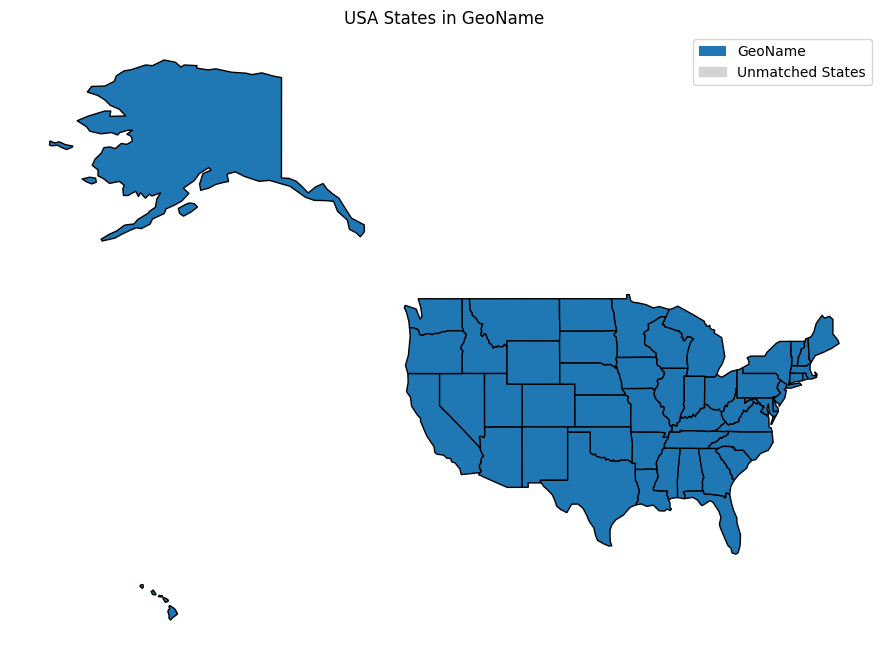

In [5]:
usa_map = eda_gdp.get_map()
eda_gdp.GeoName_map('GeoName')

##### - TableName & IndustryClassification
TableName indicate the code for this whole dataset; IndustryClassification has '...' for all rows.  
These two columns has no meaning for this analysis thus These column can be dropped.

In [6]:
df_gdp_raw[['TableName','IndustryClassification']].describe()

,TableName,IndustryClassification
count,480,480
unique,1,1
top,SAGDP1,...
freq,480,480


##### - Description
Description is the type of data indicates. There are 8 types of data and each has 60 rows of data, each row for a GeoName. The data we need is 'Current-dollar GDP (millions of current dollars)', the rest of the Description type will be dropped. 

In [7]:
df_gdp_raw['Description'].value_counts()

Description
Real GDP (millions of chained 2017 dollars) 1/                                 60
Chain-type quantity indexes for real GDP                                       60
Current-dollar GDP (millions of current dollars)                               60
Compensation (millions of dollars)                                             60
Gross operating surplus (millions of dollars)                                  60
Taxes on production and imports (TOPI) less subsides (millions of dollars)     60
 Taxes on production and imports (TOPI) (millions of dollars)                  60
 Subsidies (millions of dollars)                                               60
Name: count, dtype: int64

##### - Unit
Unit is the unit of measurement. It matches the Description. For this analysis, Current-dollar GDP (millions of current dollars)  has the unit as 'Millions of current dollars'.

##### - column 2017, 2018, 2019, 2020, 2021, 2022
The column 2017-2022 contains the data of each description for the corresponding year. These data should not be in different columns in this analysis and will be reshaped from wide format into a long format. And the data needs to be group by and filtered.  
Take the 2017 data as an example, filter the Description we need, which is Current-dollar GDP, and do a histogram of the gdp all rows. This data suggests a wide variability in Current-dollar GDP figures. The average is around \$977,122.3, with a notable standard deviation of \$2,626,492.0, indicating significant variability from the mean. The range spans from a minimum of \$32,589.2 to a maximum of \$19,612,100.0. Most values (75%) fall within the range of \$119,985.3 to \$659,468.2, highlighting a diverse distribution. The highest value should be the row 'united states' which is the sum of all states.

In [8]:
filtered_df = df_gdp_raw[df_gdp_raw['Description'] == 'Real GDP (millions of chained 2017 dollars) 1/']
filtered_df['2017'].describe()

count    6.000000e+01
mean     9.771223e+05
std      2.626492e+06
min      3.258920e+04
25%      1.199853e+05
50%      3.165803e+05
75%      6.594682e+05
max      1.961210e+07
Name: 2017, dtype: float64

Plot these results and visuallize the data with histogram through Seaborn.

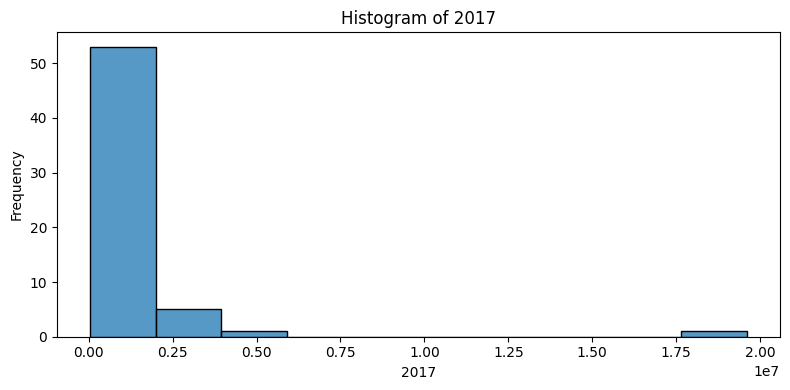

In [9]:
eda_gdp.hist_chart('2017',filtered_df)

#### 3.2 Dataset2 - Carbon Dioxide Emissions
First initialize the class EDAPerformer.After that we can see these columns provide information about different sectors/industries, types of fuel, regions, and time, along with associated numerical data and units. And We will explain step by step what each column means

In [10]:
eda_co2 = EDAPerformer(df_co2_raw)

The columns are: ['period', 'sectorId', 'sector-name', 'fuelId', 'fuel-name', 'stateId', 'state-name', 'value', 'value-units']


##### - period
Period is the year of the recorded data. There are 5 years of data, and each year has the 1248 rows of data.

In [11]:
df_co2_raw['period'].value_counts()

period
2017    1248
2018    1248
2019    1248
2020    1248
2021    1248
Name: count, dtype: int64

##### - sectorId & fuelId & stateId
sectorId is the identifier of each 'sector-name'; fuelId is the identifier of 'fuel-name'; stateId is the identifier of each 'state-name'.  
The id has no meaning for this analysis thus These columns can be dropped.

##### - sector-name
Name of the sector of the corbon diocide emission source. There are 6 sectors of emission source and each source has 1040 rows of data. In the column sector-name, rows that has 'Total carbon dioxide emissions from all sectors' is the sum of other five types of fuel. 

In [12]:
df_co2_raw['sector-name'].value_counts()

sector-name
Residential carbon dioxide emissions               1040
Total carbon dioxide emissions from all sectors    1040
Commercial carbon dioxide emissions                1040
Transportation carbon dioxide emissions            1040
Electric Power carbon dioxide emissions            1040
Industrial carbon dioxide emissions                1040
Name: count, dtype: int64

##### - fuel-name
Name of the fuel that produce co2. There are 3 types of fuel, and 1 is the sum of 3 types of fuels. Each of the fuel type has 1560 rows of data. In the column fuel, rows that has 'All Fuels' is the sum of other three types of fuel.

In [13]:
df_co2_raw['fuel-name'].value_counts()

fuel-name
Coal           1560
Natural Gas    1560
All Fuels      1560
Petroleum      1560
Name: count, dtype: int64

##### - state-name
state-name is the name of the geographical region. This column contains 52 unique elements representing states in the United States, including 1 United States, 50 individual states, and 1 Washington district.

In [14]:
display(df_co2_raw['state-name'].describe())  # noqa: F821
df_co2_raw['state-name'].unique()

count       6240
unique        52
top       Alaska
freq         120
Name: state-name, dtype: object

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Virginia', 'Vermont',
       'Washington', 'Wisconsin', 'West Virginia', 'Wyoming'],
      dtype=object)

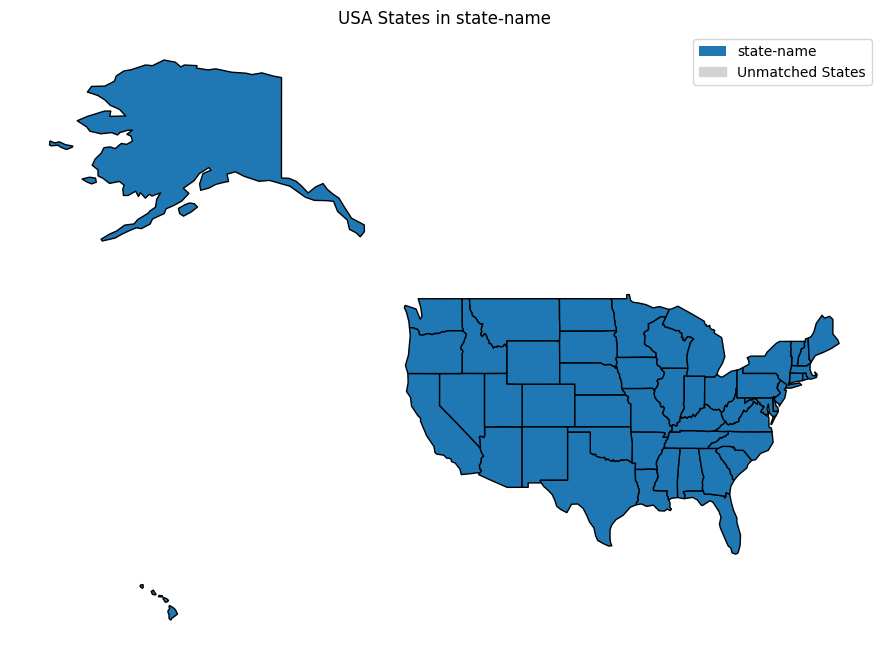

In [15]:
usa_map = eda_co2.get_map()
eda_co2.GeoName_map('state-name')

##### - value
The value of the current row. This data needs group by to show its meaning.

##### - value-units
value-units is the unit of measurement. For this analysis, all rows have the unit as 'million metric tons of CO2'.

# 4.Data Preparation

First initialize the class for data preparation.

In [16]:
from carbon_emission.data_prep import DataPrep  # noqa: E402
cleaner_gdp= DataPrep(df_gdp_raw)
cleaner_co2= DataPrep(df_co2_raw)

##### 4.1 Data cleaning
Check the null values. The null_check below shows the null value in each column. The lighter color indicates a null value. As shown, there are 4 null values in all columns except GeoFIPS. And they are in the last few lines of the dataset.

GeoName                   4
Region                    4
TableName                 4
LineCode                  4
IndustryClassification    4
Description               4
Unit                      4
2017                      4
2018                      4
2019                      4
2020                      4
2021                      4
2022                      4
GeoFIPS                   0
dtype: int64

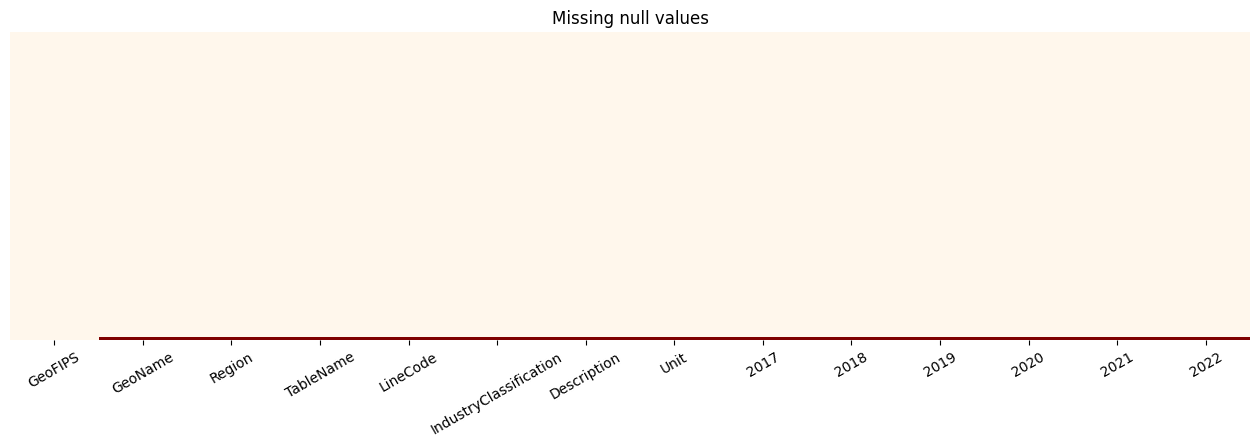

In [17]:
cleaner_gdp.null_check()

For the last 4 rows of the dataset, there are notes in the GeoFIPS column, so these rows has no meaning and can be dropped.

In [18]:
display(df_gdp_raw.tail())  # noqa: F821

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2017,2018,2019,2020,2021,2022
479,"""98000""",Far West,8,SAGDP1,8.0,...,Subsidies (millions of dollars),Millions of current dollars,-10287.4,-10697.4,-11253.6,-100592.7,-84556.8,-25748.9
480,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,SAGDP1: State annual gross domestic product (G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,"Last updated: September 29, 2023-- revised sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,U.S. Bureau of Economic Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cleaner_gdp.drop_null()

GeoFIPS                   0
GeoName                   0
Region                    0
TableName                 0
LineCode                  0
IndustryClassification    0
Description               0
Unit                      0
2017                      0
2018                      0
2019                      0
2020                      0
2021                      0
2022                      0
dtype: int64

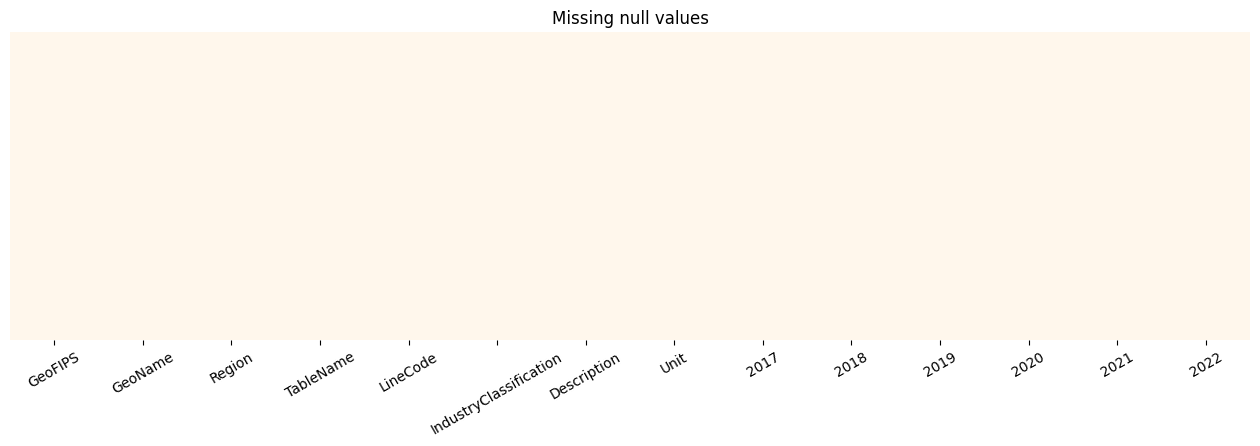

In [20]:
cleaner_gdp.null_check()

The second dataset has no null value.

period         0
sectorId       0
sector-name    0
fuelId         0
fuel-name      0
stateId        0
state-name     0
value          0
value-units    0
dtype: int64

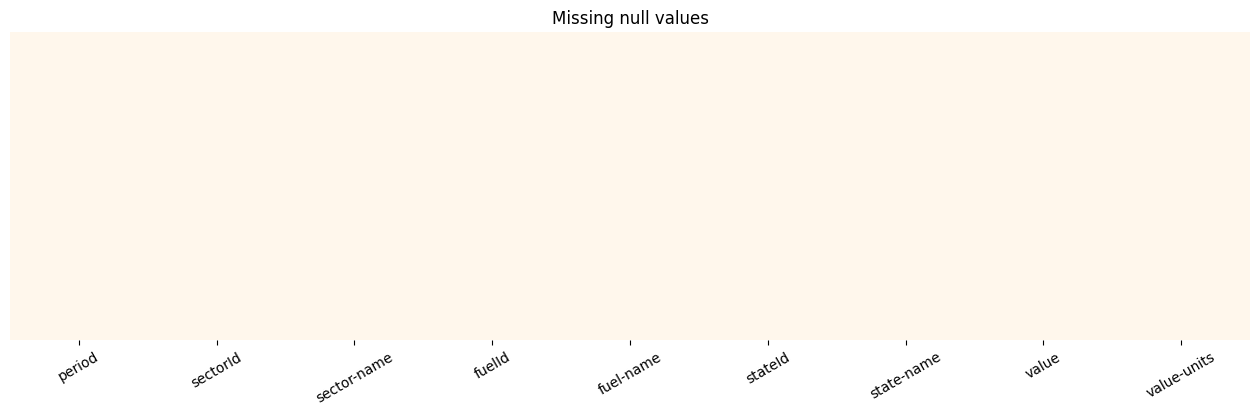

In [21]:
cleaner_co2.null_check()


Drop the column not needed an both dataset.

In [22]:
columns_to_exclude = ['GeoFIPS', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Unit']
df_gdp_c = cleaner_gdp.delete_columns(columns_to_exclude)
display(df_gdp_c.columns)  # noqa: F821



columns_to_exclude = [ 'sectorId',  'fuelId',  'stateId', 'value-units']
df_co2_c = cleaner_co2.delete_columns(columns_to_exclude)
display(df_co2_c.columns)  # noqa: F821

Index(['GeoName', 'Description', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

Index(['period', 'sector-name', 'fuel-name', 'state-name', 'value'], dtype='object')

4.2 Data Filtering

For dataset 1 GDP, select the states in united states and exclude the others. Amoung all the 6 types of summary for GDP, we only need 'Real GDP' for this analysis, so drop the rows whose Description is not 'Real GDP'.

Some column such as Year in co2 dataset as object.

In [23]:
df_gdp_c = cleaner_gdp.filter_gdp()

Since all the Description except Real GDP have been dropped, there is no need for this column.

In [24]:
df_gdp_c = cleaner_gdp.delete_columns('Description',df_gdp_c)

For dataset 2 co2, select the states in united states and exclude the others. In the column fuel, rows that has 'All Fuels' is the sum of other three types of fuel. In the column sector-name, rows that has 'Total carbon dioxide emissions from all sectors' is the sum of other five types of fuel. Remove these rows.

In [25]:
df_co2_c = cleaner_co2.filter_co2()
df_co2_c.head()

,period,sector-name,fuel-name,state-name,value
0,2017,Residential carbon dioxide emissions,Coal,Alaska,0.000000
2,2017,Residential carbon dioxide emissions,Natural Gas,Alaska,1.058200
4,2017,Commercial carbon dioxide emissions,Coal,Alaska,0.683419
5,2017,Commercial carbon dioxide emissions,Petroleum,Alaska,0.566578
6,2017,Commercial carbon dioxide emissions,Natural Gas,Alaska,0.812433


#### 4.3 Data Reshape

In [26]:
df_gdp = cleaner_gdp.gdp_reshape()
df_gdp.head()

,GeoName,Year,GDP
0,Alabama,2017,216615.5
1,Alaska,2017,53550.9
2,Arizona,2017,333099.0
3,Arkansas,2017,123882.6
4,California,2017,2740550.3


Have the dataset group by year and state, the value will be the sum of the all sector and all fuel sources.

In [27]:
df_co2_year = cleaner_co2.co2_groupby_year()
df_co2_year.head()

,period,state-name,value
0,2017,Alabama,108.594554
1,2017,Alaska,33.731096
2,2017,Arizona,90.480866
3,2017,Arkansas,64.176360
4,2017,California,356.532043


Have the dataset group by year and sector, the value will be the sum of the all states and all fuel sources.

In [28]:
df_co2_sector = cleaner_co2.co2_groupby_sector()
df_co2_sector.head()

,period,sector-name,value
0,2017,Commercial carbon dioxide emissions,235.691938
1,2017,Electric Power carbon dioxide emissions,1732.720148
2,2017,Industrial carbon dioxide emissions,967.847972
3,2017,Residential carbon dioxide emissions,302.667513
4,2017,Transportation carbon dioxide emissions,1904.741626


Have the dataset group by state and fuel, the value will be the sum of the all year and all sectors.

In [29]:
df_co2_fuel = cleaner_co2.co2_groupby_fuel()
df_co2_fuel.head()

,state-name,fuel-name,value
0,Alabama,Coal,156.360302
1,Alabama,Natural Gas,190.777126
2,Alabama,Petroleum,186.891410
3,Alaska,Coal,8.477987
4,Alaska,Natural Gas,91.443712


For research question X, we need the dataset to be pivoted, take the state name as the index and make the type of 'fuel-name' as columns.

In [30]:
df_co2_p = cleaner_co2.co2_pivot()
df_co2_p.head()

fuel-name,state-name,Coal,Natural Gas,Petroleum
0,Alabama,156.360302,190.777126,186.891410
1,Alaska,8.477987,91.443712,77.451937
2,Arizona,118.721565,117.125339,204.467669
3,Arkansas,113.834658,91.462078,111.513513
4,California,14.738054,569.992849,1116.527130


For research question X, we need the GDP data of each year and state in dataset 1, and the carbon emission of each sector from dataset 2. To combine two dataset, we will aggregate the fuel type in each sector, which means group by period, state-name, sector-name. Also do a pivot to make the five types of sector(Commercial,Electric Power, Industrial,Residential and Transportation) the columns. And then do an left join on year and state-name.

In [31]:
df_co2_gdp = cleaner_co2.gdp_co2(df_gdp)
df_co2_p.head()

fuel-name,state-name,Coal,Natural Gas,Petroleum
0,Alabama,156.360302,190.777126,186.891410
1,Alaska,8.477987,91.443712,77.451937
2,Arizona,118.721565,117.125339,204.467669
3,Arkansas,113.834658,91.462078,111.513513
4,California,14.738054,569.992849,1116.527130


# 5.Prepped Data Review

After reorganizing the data set, we can now make some meaningful presentations
#### -GDP Top5 States
We have two main datasets for analysis. First, let's take a look at the GDP changes of the top 5 states in the United States over time. And it's obvious that with the change of time, GDP increases year by year, but we can see that compared with 2019, GDP has declined in 2020. After checking, we can see that the world’s GDP has declined due to the COVID-19.

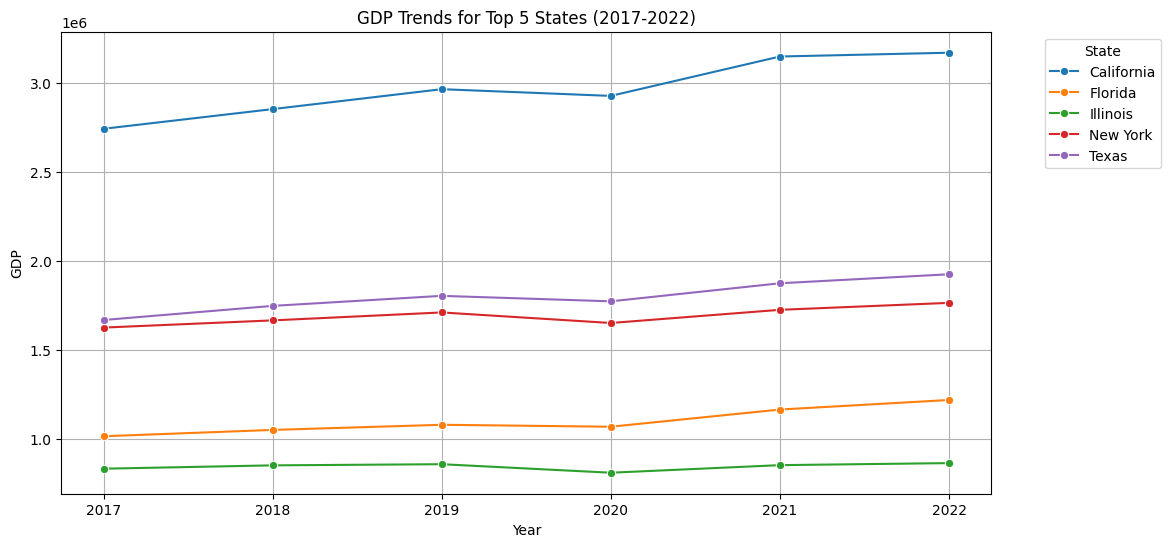

In [32]:
from carbon_emission.prepped import Prepped  # noqa: E402
eda_gdp=Prepped(df_gdp)
eda_gdp.line_top5gdp()

#### -Total carbon emission change over years.
After understanding the overall changes in GDP, let’s take a look at the carbon emissions from 2017 to 2021.It is obvious that before January 2019, the fluctuation of carbon emissions was basically around 5200. Starting from January 2019, carbon emissions dropped sharply. The reason was that the COVID-19 epidemic led to a reduction in human activities and factories, and a simultaneous decline in carbon emissions. This also Further confirms the impact of the new crown epidemic on the economy and carbon emissions.

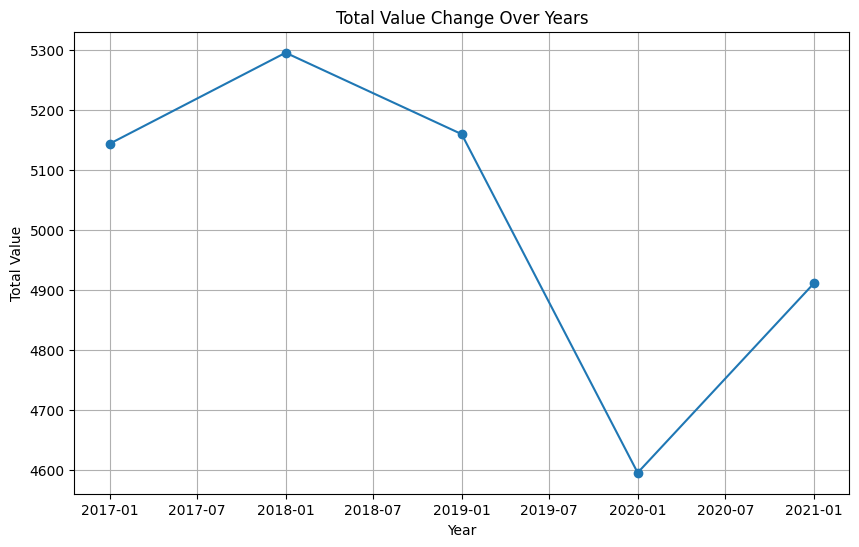

In [33]:
eda_gdp=Prepped(df_co2_c)
eda_gdp.value_time()

#### -Carbon emission by Sector and Period
After observing the overall situation of GDP and carbon emissions, let's take a detailed look at the main sectors of carbon emissions and what their values are.As can be seen from the table below, the largest total carbon emissions in the United States during the past five years were caused by transportation, followed by electricity, and the third highest amount was caused by industry.

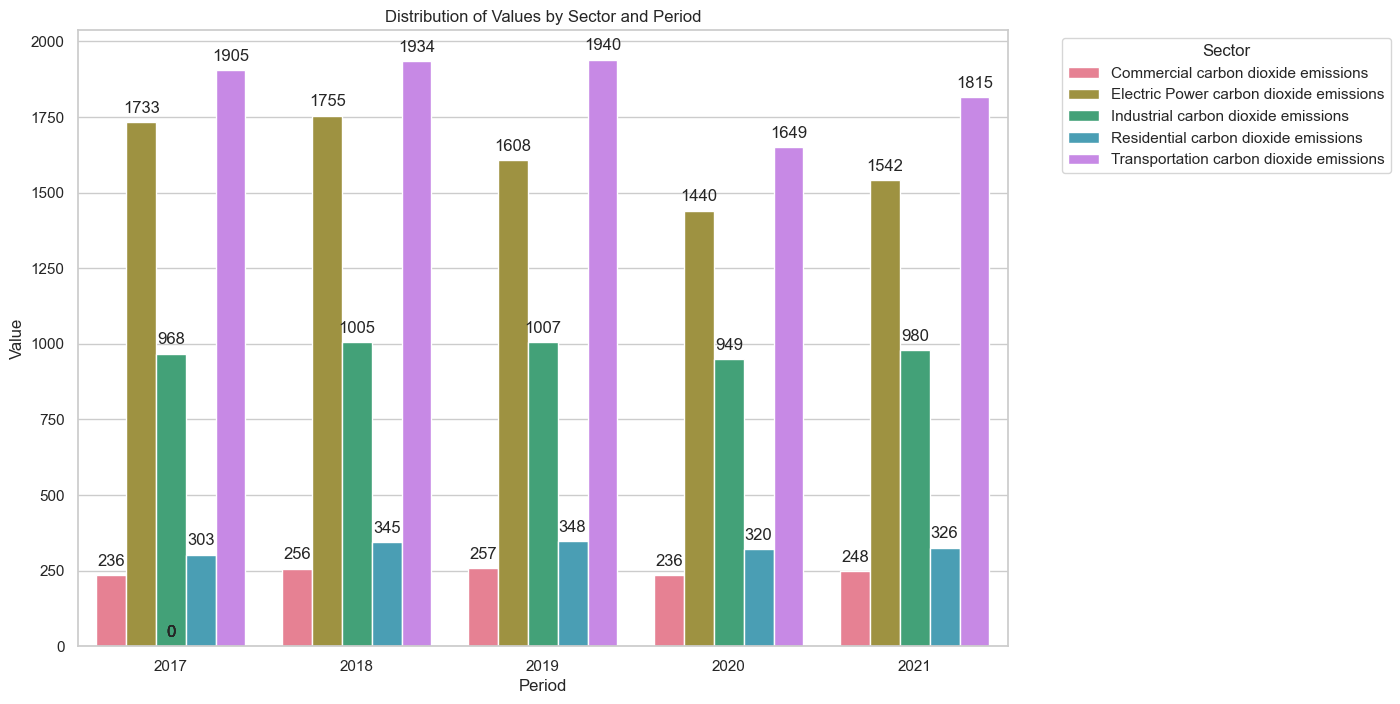

In [34]:
eda_gdp=Prepped(df_co2_sector)
eda_gdp.sec_name_by_time()

#### -Fuel percentage by Sector
After analyzing Carbon emission by Sector and Period, let’s take a look at what the main fuel is in each sector. Because transportation emits the largest amount of carbon emissions, we first look at the main fuel sources for transportation.As can be seen from the figure below, the main source of carbon emissions in the transportation sector is petroleum, the main source of carbon emissions in electricity is coal mines, and the main source of carbon emissions in industry is natural gas.

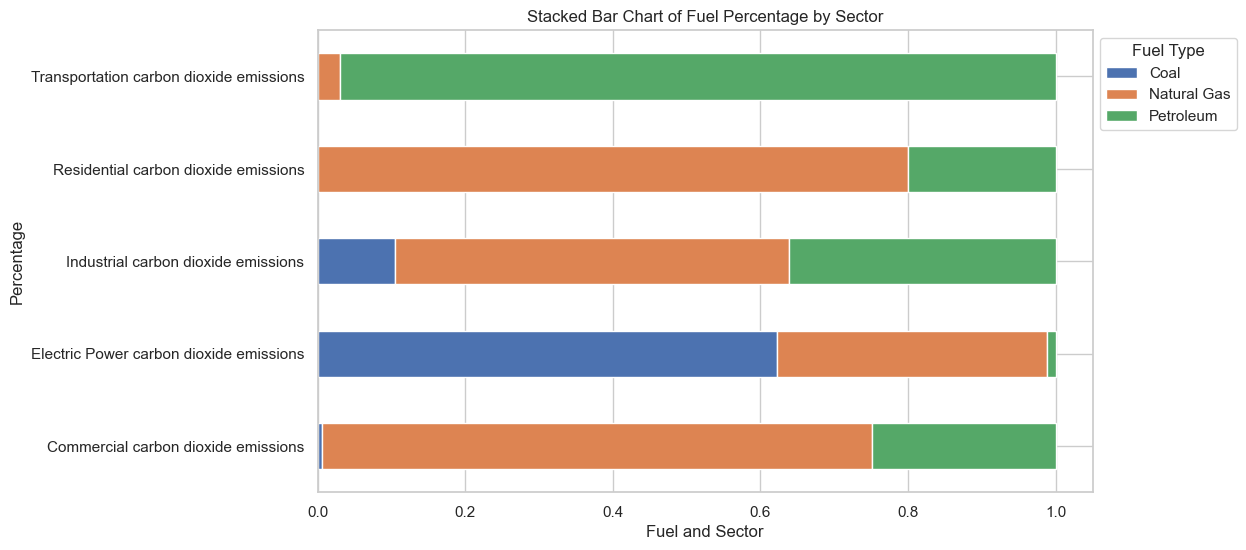

In [35]:
eda_gdp=Prepped(df_co2_c)
eda_gdp.fuel_sector_percen()

#### -Emission Value by Fuel Type for TOP 10 State
From the figure below, we can see that the source of carbon emissions in most states is mainly caused by the use of petroleum, with Texas bearing the brunt.One of the reasons for the primary association of carbon emissions in the United States with petroleum is the widespread use of petroleum in the transportation sector. Petroleum is the primary fuel for internal combustion engine vehicles, including private cars, trucks, and public transportation. The combustion process of these vehicles produces carbon dioxide (CO2) and other greenhouse gases, contributing to an increase in carbon emissions in the air.This also confirms our conclusion in the previous section

The high gasoline consumption in Texas is influenced by various factors related to the state's economic structure, geographical characteristics, and culture. Here are some factors that may contribute to the high gasoline consumption in Texas:
1. Large and dispersed cities
2. Oil industry

It's important to note that these factors may interact with each other, collectively influencing various aspects of gasoline consumption in Texas. The state's geographical, economic, and cultural factors contribute to its relatively high demand for gasoline.

Top 10 States by Total Emission Value:
state-name
Texas           3321.455463
California      1701.258033
Florida         1148.123543
Pennsylvania    1061.037838
Ohio             990.436336
Illinois         976.957035
Louisiana        955.034468
Indiana          862.120677
New York         809.429206
Michigan         763.361753
Name: value, dtype: float64


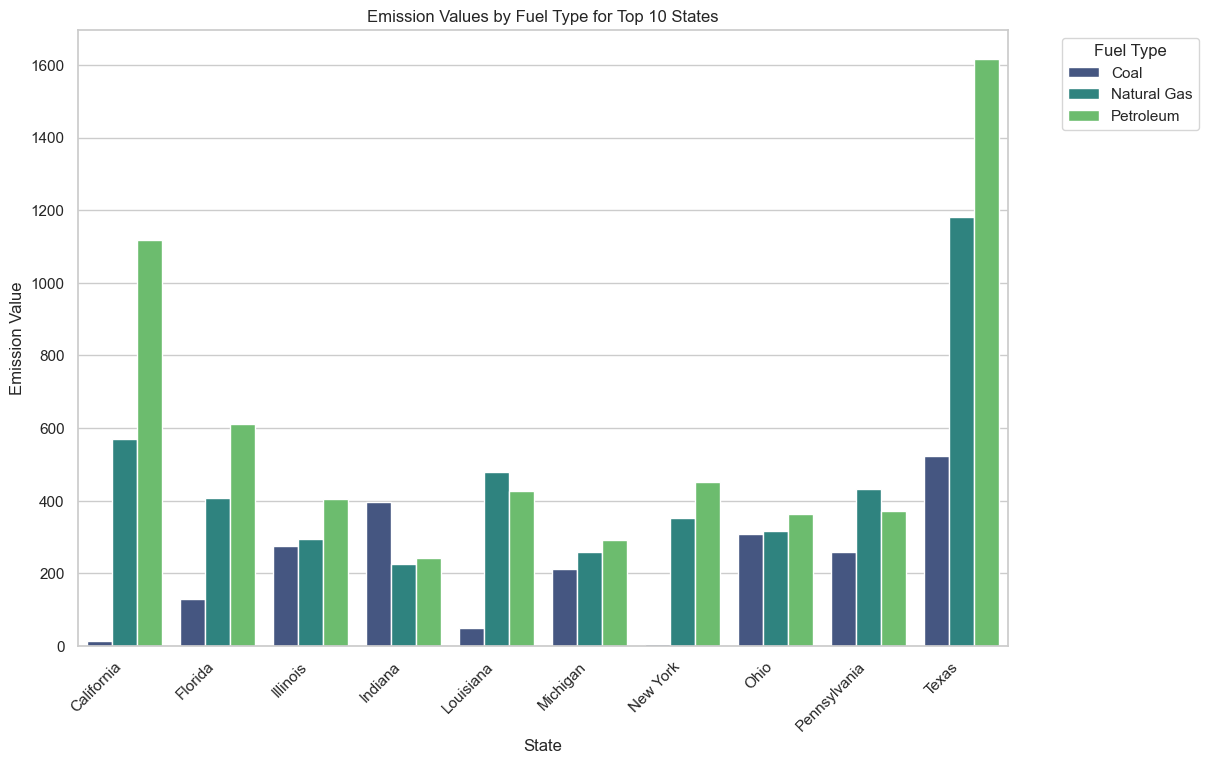

In [36]:
eda_gdp=Prepped(df_co2_fuel)
eda_gdp.state_value()

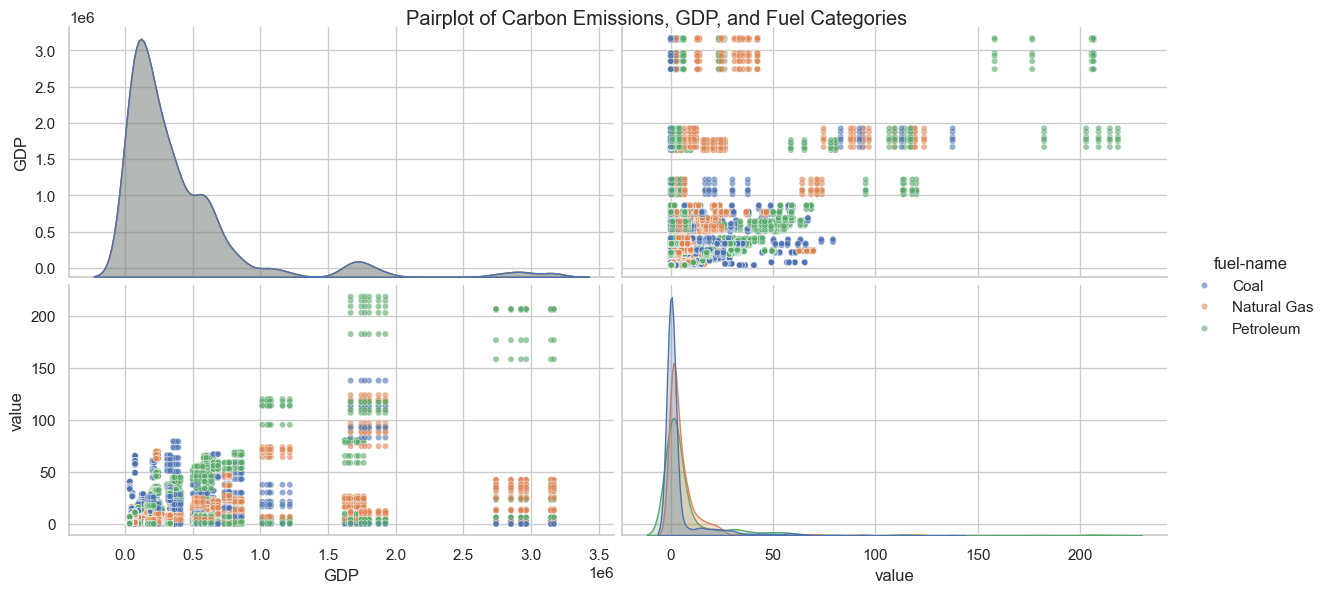

In [37]:
from carbon_emission.prepped import State_value  # noqa: E402
gdp_value = State_value()
gdp_value.plot_pairplot(df_co2_c,df_gdp)


# 6.Investigative Analysis & Results

In [38]:
from carbon_emission.results import ModelBuilder
model_co2 = ModelBuilder(df_co2_p)
df_cluster = model_co2.state_fuel_cluster()
df_cluster.head(10)

fuel-name,state-name,Coal,Natural Gas,Petroleum,Cluster
0,Alabama,156.360302,190.777126,186.891410,0
1,Alaska,8.477987,91.443712,77.451937,4
2,Arizona,118.721565,117.125339,204.467669,0
3,Arkansas,113.834658,91.462078,111.513513,4
4,California,14.738054,569.992849,1116.527130,3
5,Colorado,128.530326,137.554800,169.799490,0
6,Connecticut,0.989848,75.389936,101.844900,4
7,Delaware,1.701234,24.898425,40.198575,4
8,District of Columbia,0.006889,7.997398,5.166259,4
9,Florida,129.117770,407.173074,611.832699,1


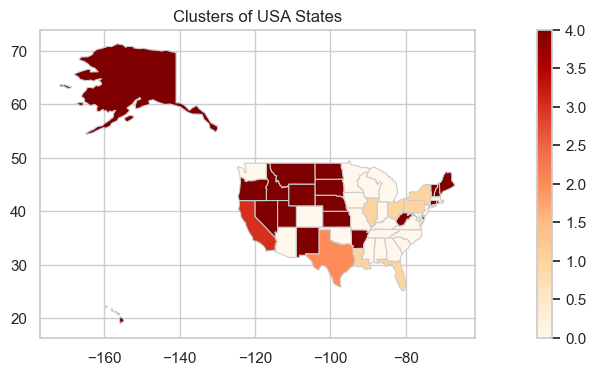

In [39]:
model_co2.map_fuel()

In [40]:
model_gdp_co2 = ModelBuilder(df_co2_gdp)
model_gdp_co2.gdp_co2()

Mean Squared Error with Normalized Features: 10269349915.366892
R-squared Score with Normalized Features: 0.8781660998480856
Commercial carbon dioxide emissions        6.076230e+05
Electric Power carbon dioxide emissions   -9.216318e+05
Industrial carbon dioxide emissions       -3.458829e+05
Residential carbon dioxide emissions       2.102627e+05
Transportation carbon dioxide emissions    2.743136e+06
dtype: float64


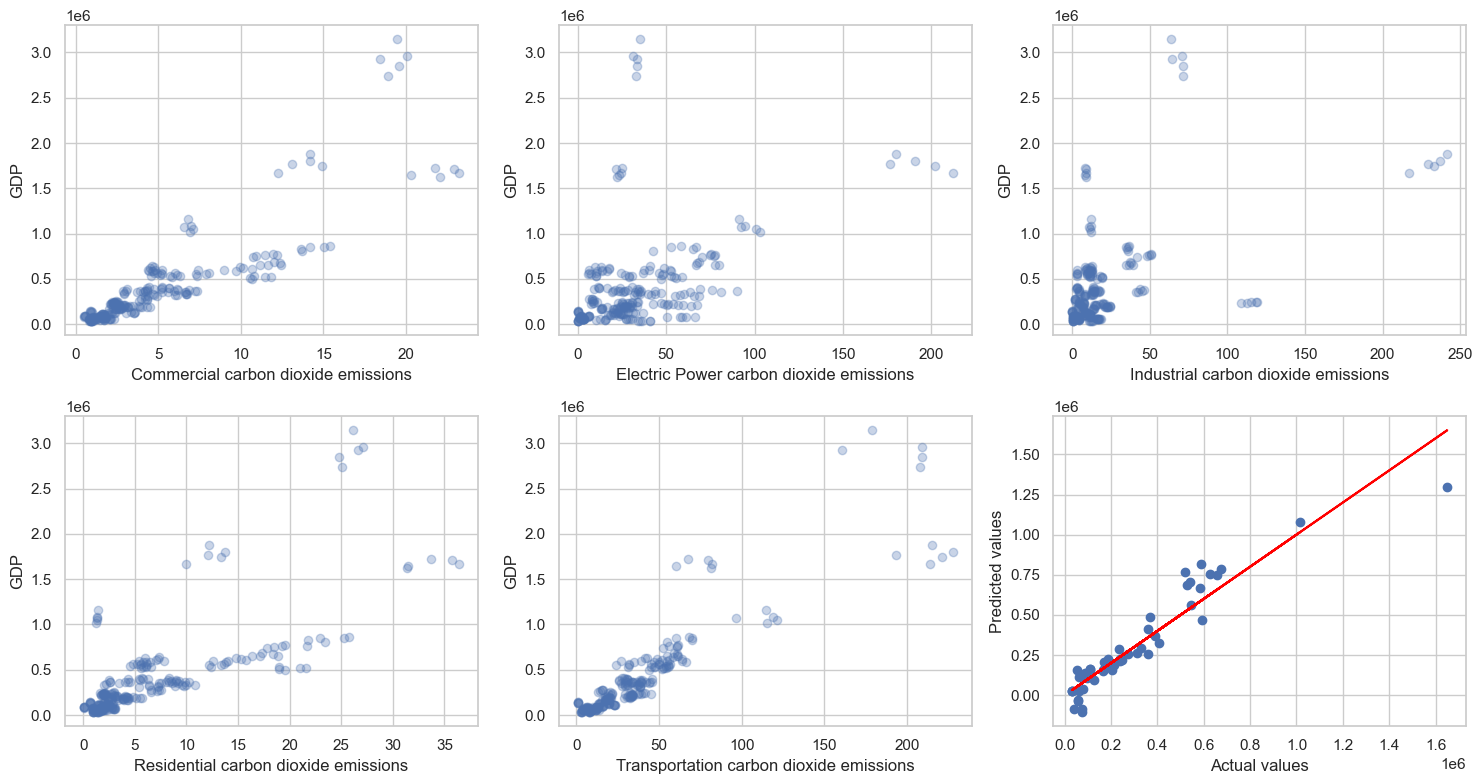

In [41]:
model_gdp_co2.scatter()

# 7.Conclusions 

# 8.References

[GDP and COVID-19](https://www.reuters.com/article/us-usa-economy/covid-19-savages-u-s-economy-2020-performance-worst-in-74-years-idINKBN29X0I8/)


[Carbon emission and COVID-19](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10281825/#:~:text=A%20study%20published%20in%20Nature,year%20earlier%20on%20April%207.)

[Reason of Petroleum](https://www.nationalgeographic.com/environment/article/fossil-fuels)